In [1]:
import pandas as pd
import seaborn as sns

In [2]:
titanic = pd.read_csv('../data/primeiros_tratamentos', index_col=['PassengerId'])

In [3]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Fare,Cabin,Embarked,Grupo de Prioridade
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,False


In [4]:
titanic.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

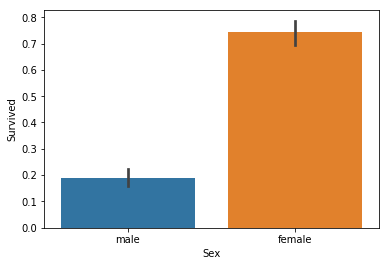

In [5]:
sns.barplot(data=titanic, x='Sex', y='Survived')

## Jeito de gente séria pra entender se eh significativo ou nao

In [50]:
from scipy.stats import chisquare

In [51]:
# Pegando a distribuição:

# sim, deve ter algo do scipy que faz isso automatico

#dado que voce eh um homem, quanto voce sobrevive?
mask_survived = titanic['Survived'] == 1
mask_male = titanic['Sex'] == 'male'
mask_male_s = mask_survived & mask_male

#dado que voce eh uma mulher, quanto voce sobrevive?
mask_female = titanic['Sex'] == 'female'
mask_female_s = mask_survived & (titanic['Sex'] == 'female')

freq_male = titanic[mask_male_s].count()[0] / titanic[mask_male].count()[0]
freq_female = titanic[mask_female_s].count()[0] / titanic[mask_female].count()[0]

In [52]:
display(freq_male, freq_female)

0.18890814558058924

0.7420382165605095

In [56]:
freq_male + freq_female

0.9309463621410987

In [9]:
#lembra do resultado esperado? bom, a sobrevivencia esperada ta como 50%, mas isso nao eh bem verdade...
sobrevivencia_esperada = (titanic[titanic['Survived'] == 1] .count()
                          / titanic['Survived'].count())[0]

In [10]:
sobrevivencia_esperada

0.3838383838383838

In [11]:
se = sobrevivencia_esperada
chisquare([freq_male, freq_female] , [se, se])

Power_divergenceResult(statistic=0.43326807571027737, pvalue=0.51038969499162)

## Testando com valores absolutos

In [12]:
gpby = titanic.groupby(['Sex'])['Survived'].value_counts() 
gpby

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [13]:
gpby['female'][1]

233

In [14]:
sob_homens = gpby['male'][1]
sob_mulheres = gpby['female'][1]
esp_sob_homens = (gpby['male'][1] + gpby['male'][0]) * se
esp_sob_mulheres = (gpby['female'][1] + gpby['female'][0]) * se

In [15]:
print(f"{sob_homens} -- {sob_mulheres} -- {esp_sob_homens} -- {esp_sob_mulheres}")

109 -- 233 -- 221.47474747474746 -- 120.52525252525251


In [17]:
chisquare([sob_homens, sob_mulheres],
          [esp_sob_homens, esp_sob_mulheres])

Power_divergenceResult(statistic=162.08166685161615, pvalue=3.970516389658672e-37)

# Agora com o teste chi no braço

In [18]:
esp_mulher = 0.5
esp_homem = 0.5

In [30]:
gpby = titanic.groupby(['Sex']).Survived.value_counts()
gpby

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [46]:
# of who survived, what percentage is male and female
m_s = gpby['male'][1]
f_s = gpby['female'][1]

total = m_s + f_s

percent_m_s = m_s / total
percent_f_s = f_s / total

In [49]:
percent_f_s

0.6812865497076024

### Eu esqueci os pesos!

In [69]:
titanic[mask_male].count()[0]

577

In [70]:
titanic[mask_female].count()[0]

314

In [72]:
titanic[mask_survived].count()[0]

342

In [73]:
# na vdd, o guri lembrou dos pesos, soh que a gente precisa enfiar em valores relativos agora.
gpby = titanic.groupby(['Sex'])['Survived'].value_counts() 
gpby

gpby['female'][1]

sob_homens = gpby['male'][1]
sob_mulheres = gpby['female'][1]
esp_sob_homens = (gpby['male'][1] + gpby['male'][0]) * se
esp_sob_mulheres = (gpby['female'][1] + gpby['female'][0]) * se

In [74]:
# freq_esp_homens = se

freq_real_homens = sob_homens / titanic[mask_male].count()[0]
freq_real_mulheres = sob_mulheres / titanic[mask_female].count()[0]

In [75]:
display(freq_real_homens, freq_real_mulheres)

0.18890814558058924

0.7420382165605095

# Depois de ver o Khan, tentando com frequencias absolutas denovo

# Sei la no fim nem eh tao bom assim

In [33]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Fare,Cabin,Embarked,Grupo de Prioridade
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,False


In [44]:
titanic.drop('Grupo de Prioridade', axis=1)

KeyError: "['Grupo de Prioridade'] not found in axis"

In [48]:
titanic['crianca'] = True

In [50]:
mask = titanic['Age'] < 14
titanic['crianca'] = mask

In [51]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Fare,Cabin,Embarked,crianca
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,False


In [91]:
names_list = []

for name in titanic['Name']:
    names_list.append(name.split(" "))
    

In [92]:
df2 = pd.DataFrame(names_list)

In [54]:
titles = []
for lista in names_list:
    for name in lista:
        if "." in name:
            titles.append(name)

In [56]:
titles = pd.Series(titles)

In [59]:
titles.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'L.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [ ]:
def makeall():
    for title in titles
        makeOne

In [65]:
mask = titanic['Name'].isin(['Mr.'])
titanic.mask.head()

AttributeError: 'function' object has no attribute 'head'

In [66]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"Braund,",Mr.,Owen,Harris,None,None,None,None,None,None,None,None,None,None
1,"Cumings,",Mrs.,John,Bradley,(Florence,Briggs,Thayer),None,None,None,None,None,None,None
2,"Heikkinen,",Miss.,Laina,None,None,None,None,None,None,None,None,None,None,None
3,"Futrelle,",Mrs.,Jacques,Heath,(Lily,May,Peel),None,None,None,None,None,None,None
4,"Allen,",Mr.,William,Henry,None,None,None,None,None,None,None,None,None,None


In [75]:
df_mask = df2.isin(['Mr.'])

In [76]:
def penis(lista):
    for i in lista:
        if(i == True):
            return True
    return False

In [77]:
df_mask.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [79]:
df_mask.apply(penis, axis=1).head()

0     True
1    False
2    False
3    False
4     True
dtype: bool

In [80]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Fare,Cabin,Embarked,crianca
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,False


In [81]:
df3 = titanic

In [82]:
df3["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [90]:
name_list[]

SyntaxError: invalid syntax (<ipython-input-90-370207c543ec>, line 1)

In [94]:
df2.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"Braund,",Mr.,Owen,Harris,None,None,None,None,None,None,None,None,None,None
1,"Cumings,",Mrs.,John,Bradley,(Florence,Briggs,Thayer),None,None,None,None,None,None,None
2,"Heikkinen,",Miss.,Laina,None,None,None,None,None,None,None,None,None,None,None
3,"Futrelle,",Mrs.,Jacques,Heath,(Lily,May,Peel),None,None,None,None,None,None,None
4,"Allen,",Mr.,William,Henry,None,None,None,None,None,None,None,None,None,None
